# Lesson 6 - Starter Code

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import sklearn.linear_model

# read in the mammal dataset
wd = "C:/Users/BeckyC/Desktop/Data Science - GA files/"
mammals = pd.read_csv(wd+'msleep.csv')
mammals = mammals[mammals.brainwt.notnull()].copy() ## removing nulls from brainwt

### Explore our mammals dataset

In [28]:
mammals.head()

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
1,Owl monkey,Aotus,omni,Primates,NaN,17.0,1.8,NaN,7.0,0.01550,0.480
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.133333,9.1,0.00029,0.019
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666667,20.0,0.42300,600.000
8,Dog,Canis,carni,Carnivora,domesticated,10.1,2.9,0.333333,13.9,0.07000,14.000
9,Roe deer,Capreolus,herbi,Artiodactyla,lc,3.0,NaN,NaN,21.0,0.09820,14.800


### Lets check out a scatter plot of body wieght and brain weight

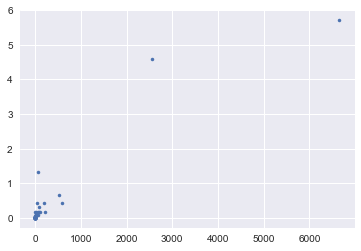

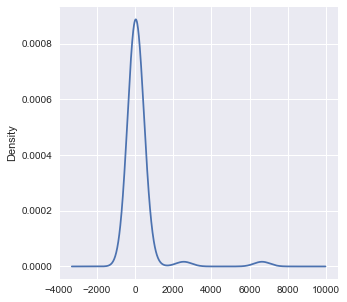

In [29]:
# create a matplotlib figure
plt.figure()
# generate a scatterplot inside the figure
plt.plot(mammals.bodywt, mammals.brainwt, '.')
# show the plot
plt.show()


##checking if data is normally distributed... 
mammals['bodywt'].plot(kind="density", figsize=(5,5))

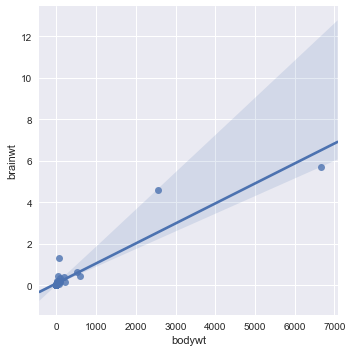

In [30]:
sns.lmplot('bodywt', 'brainwt', mammals) ##lmplot is from the seaborn library

#shaded line is the error, range of coefficients based on 95% confidence
#error margin increases where fewer observations are available to learn from.

In [3]:
log_columns = ['bodywt', 'brainwt',]
log_mammals = mammals.copy()
log_mammals[log_columns] = log_mammals[log_columns].apply(np.log10) # log is applied to both X & Y in this example.

#log10 - apply log to a skewed dataset to make the data set more normally distributed and improve the model

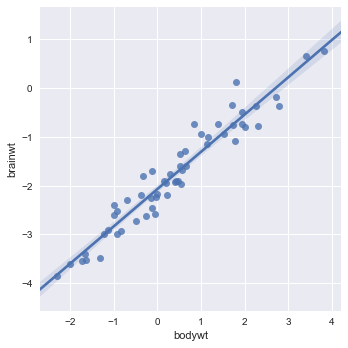

In [8]:
sns.lmplot('bodywt', 'brainwt', log_mammals)

## Guided Practice: Using Seaborn to generate single variable linear model plots (15 mins)
Update and complete the code below to use lmplot and display correlations between body weight and two dependent variables: sleep_rem and awake.


In [67]:
log_columns = ['awake', 'brainwt','sleep_rem','bodywt']  # creating a list of the names. any others?
log_mammals = mammals.copy() # take a copy of the data 
log_mammals[log_columns] = log_mammals[log_columns].apply(np.log10) # overwrite columns with log in the new data frame.

print("original", mammals[['brainwt','awake','sleep_rem']].head()) 
print("logged", log_mammals[['brainwt','awake','sleep_rem']].head())




original    brainwt  awake  sleep_rem
1  0.01550    7.0        1.8
3  0.00029    9.1        2.3
4  0.42300   20.0        0.7
8  0.07000   13.9        2.9
9  0.09820   21.0        NaN
logged     brainwt     awake  sleep_rem
1 -1.809668  0.845098   0.255273
3 -3.537602  0.959041   0.361728
4 -0.373660  1.301030  -0.154902
8 -1.154902  1.143015   0.462398
9 -1.007889  1.322219        NaN


##### Complete below for sleep_rem and awake as a y, with variables you've already used as x.


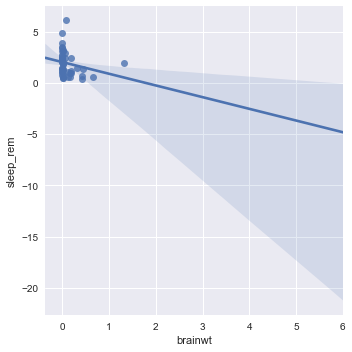

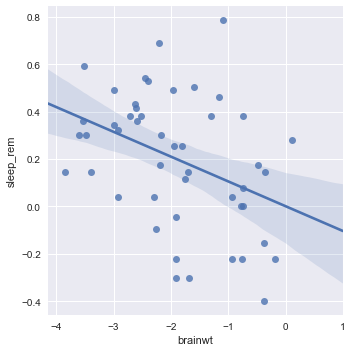

In [49]:
x = 'brainwt'
y = 'sleep_rem'
sns.lmplot(x, y, mammals) #original 
sns.lmplot(x, y, log_mammals) #logged

## Introduction: Single Regression Analysis in statsmodels & scikit (10 mins)

In [71]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

X = log_mammals[['bodywt']] ##double puts this as a dataframe, this is because you could have multiple x values, but only one Y
y = log_mammals['brainwt']

# create a fitted model in one line
#formula notation is the equivalent to writing out our models such that 'outcome = predictor'
#with the follwing syntax formula = 'outcome ~ predictor1 + predictor2 ... predictorN'
lm = smf.ols(formula='y ~ X', data=log_mammals).fit() #OLS = ordinary least squared linear regression model 
#print the full summary
lm.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     738.4
Date:                Mon, 03 Apr 2017   Prob (F-statistic):           3.56e-33
Time:                        17:48:42   Log-Likelihood:                -8.9817
No. Observations:                  56   AIC:                             21.96
Df Residuals:                      54   BIC:                             26.01
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -2.0739      0.040    -51.463      0.000        -2.155    -1.993
X              0.7652      0.028     27.173      0.000         0.709     0.822
==============================================================================
Omnibus:                        4.775   Durbin-Watson:                   2.240
Prob(Omnibus):                  0.092   Jarque-Bera (JB):                4.060
Skew:                           0.653   Prob(JB):                        0.131
Kurtosis:                       3.193   Cond. No.                         1.59
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Use Statsmodels to make the prediction

In [34]:
# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'X': [50]})
X_new.head()

,X
0,50


In [35]:
##predict Y if X is 50...
lm.predict(X_new)

array([ 0.13411477])

### Repeat in Scikit with handy plotting

When modeling with sklearn, you'll use the following base principals:

- All sklearn estimators (modeling classes) are based on this base estimator. This allows you to easily rotate through estimators without changing much code.
- All estimators take a matrix, X, either sparse or dense.
- Many estimators also take a vector, y, when working on a supervised machine learning problem. Regressions are supervised learning because we already have examples of y given X.
- All estimators have parameters that can be set. This allows for customization and higher level of detail to the learning process. The parameters are appropriate to each estimator algorithm.

In [4]:
from sklearn import feature_selection, linear_model

# writing a function so that the same model can be called for different 'features' aka predictors. 

def get_linear_model_metrics(X, y, algo): #algo shorthand for algorithm
    # get the pvalue of X given y. Ignore f-stat for now.
    pvals = feature_selection.f_regression(X, y)[1] # calculate p values for each feature (X)
    
    # start with an empty linear regression object
    
    algo.fit(X,y) # .fit() runs the linear regression function on X and y
    residuals = (y-algo.predict(X)).values #this captures the error between actual Y and predicted Y.

    # print the necessary values
    print ('P Values:', pvals)
    print ('Coefficients:', algo.coef_)
    print ('y-intercept:', algo.intercept_)
    print ('R-Squared:', algo.score(X,y))
    plt.figure()
    plt.hist(residuals, bins=np.ceil(np.sqrt(len(y))))
    # return keeps the model so that we can refer to its outputs later
    return algo


## Demo: Significance is Key (20 mins)

P Values: [  9.15540205e-26]
Coefficients: [ 0.00096395]
y-intercept: 0.0859173102936
R-Squared:

C:\Users\BeckyC\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
C:\Users\BeckyC\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:611: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


 0.871949198087


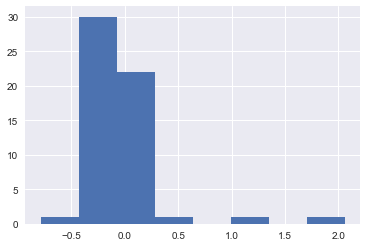

In [54]:
#Calling the function & building a model...
X = mammals[['bodywt']] # putting 2 brackets means that this is considered a data frame (rather than a series?)
y = mammals['brainwt']
lm = linear_model.LinearRegression()

# this is the function created above; func(x,y,algo)
lm = get_linear_model_metrics(X, y, lm) # this is plotting the residuals

### What does our output tell us?

Our output tells us that:

* The relationship between bodywt and brainwt isn't random (p value approaching 0)  
* The model explains, roughly, 87% of the variance of the dataset (the largest errors being in the large brain and body sizes)  
* With this current model, brainwt is roughly bodywt * 0.00096395  
* The residuals, or error in the prediction, is not normal, with outliers on the right. A better with will have similar to normally distributed error.

### Evaluating Fit, Evaluating Sense

Although we know there is a better solution to the model, we should evaluate some other sense things first. For example, given this model, what is an animal's brainwt if their bodywt is 0?

In [40]:
# prediction at 0?
print (lm.predict([[0]]))

## if we predict the weight of an animals brain which has no body weight, then the model predicts 0.08 units.
## this isn't logical, if we have no weight, we should have no brain weight
## so for this model it would be more logical to remove the y intercept, so zero body weight = zero brain weight

[ 0.08591731]


P Values: [  9.15540205e-26]
Coefficients: [ 0.00098291]
y-intercept: 0.0
R-Squared: 0.864418807451


C:\Users\BeckyC\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
C:\Users\BeckyC\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:611: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


[ 0.]


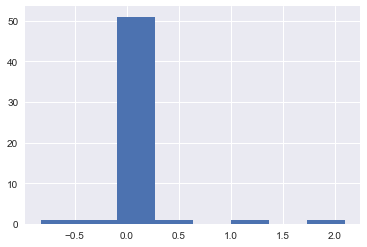

In [56]:
##change the alogorithm to remove the intercept.
lm = linear_model.LinearRegression(fit_intercept=False) ## removing intercept
lm = get_linear_model_metrics(X, y, lm)
# prediction at 0?
print (lm.predict([[0]]))

## Intrepretation?


Answer: R sqd has reduced from 0.87 to o.86, so the new model doesnt explain as much, however the new model is more logical.

In [60]:
log_mammals.head()

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
1,Owl monkey,Aotus,omni,Primates,NaN,17.0,0.255273,NaN,0.845098,-1.809668,-0.318759
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,0.361728,0.133333,0.959041,-3.537602,-1.721246
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.0,-0.154902,0.666667,1.301030,-0.373660,2.778151
8,Dog,Canis,carni,Carnivora,domesticated,10.1,0.462398,0.333333,1.143015,-1.154902,1.146128
9,Roe deer,Capreolus,herbi,Artiodactyla,lc,3.0,NaN,NaN,1.322219,-1.007889,1.170262


## Guided Practice: Using the LinearRegression object (15 mins)

We learned earlier that the data in its current state does not allow for the best linear regression fit. 

With a partner, generate two more models using the log-transformed data to see how this transform changes the model's performance. 

Complete the following code to update X and y to match the log-transformed data. 

Complete the loop by setting the list to be one True and one False.

y-intercept: True
P Values: [  3.56282243e-33]
Coefficients: [ 0.76516177]
y-intercept: -2.07393164084
R-Squared: 0.931851615367


C:\Users\BeckyC\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
C:\Users\BeckyC\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:611: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


y-intercept: False
P Values: [  3.56282243e-33]
Coefficients: [ 0.35561441]
y-intercept: 0.0
R-Squared: -2.41053211437


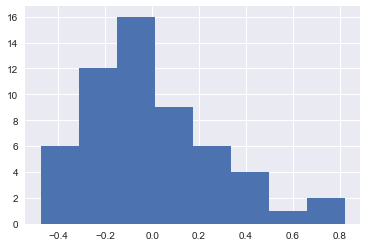

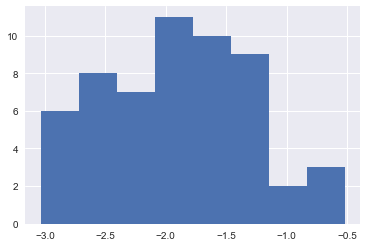

In [64]:
#starter
X =log_mammals[['bodywt']]
y =log_mammals['brainwt']
loop = [True,False]
for boolean in loop:
    print ('y-intercept:', boolean)
    lm = linear_model.LinearRegression(fit_intercept=boolean) # this loop is applying the model with and without the intercept
    get_linear_model_metrics(X, y, lm)
    print

### Which model performed the best? The worst? Why?


Answer: Log models predicting brain weight from body weight are better where the intercept is included - the residuals plot shows that errors are more centred around 0 and the r sqd is 0.93 with intercept and -2.41 without intercept. 

### Advanced Methods! 

We will go over different estimators in detail in the future but check it out in the docs if you're curious (and finish a little early)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
P Values: [  3.56282243e-33]
Coefficients: [ 0.23454772]
y-intercept: -1.85931606304
R-Squared: 0.483728109403


C:\Users\BeckyC\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
C:\Users\BeckyC\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:611: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
P Values: [  3.56282243e-33]
Coefficients: [ 0.75797972]
y-intercept: -2.07102674342
R-Squared: 0.931769516561


C:\Users\BeckyC\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
C:\Users\BeckyC\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:611: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
P Values: [  3.56282243e-33]
Coefficients: [ 0.39504621]
y-intercept: -1.9242323166
R-Squared: 0.71382228495


C:\Users\BeckyC\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
C:\Users\BeckyC\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:611: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


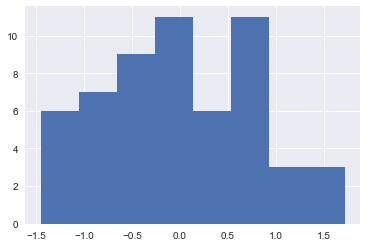

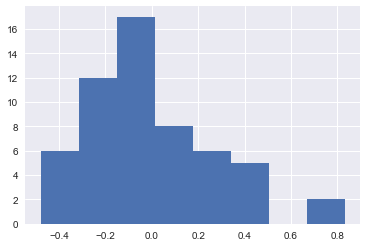

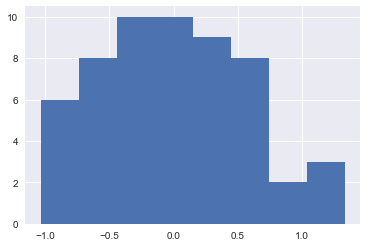

In [66]:
# loading other sklearn regression estimators
X = log_mammals[['bodywt']]
y = log_mammals['brainwt']

estimators = [
    linear_model.Lasso(),
    linear_model.Ridge(),
    linear_model.ElasticNet(),
]

for est in estimators:
    print (est)
    get_linear_model_metrics(X, y, est)
    print


## Introduction: Multiple Regression Analysis using citi bike data (10 minutes)


In the previous example, one variable explained the variance of another; however, more often than not, we will need multiple variables. 

For example, a house's price may be best measured by square feet, but a lot of other variables play a vital role: bedrooms, bathrooms, location, appliances, etc. 

For a linear regression, we want these variables to be largely independent of each other, but all of them should help explain the Y variable.

We'll work with bikeshare data to showcase what this means and to explain a concept called multicollinearity.

In [6]:
wd = 'C:/Users/BeckyC/Desktop/Data Science - GA files/'
bike_data = pd.read_csv(wd+'bikeshare.csv')
bike_data.head()
bike_data['casual'].describe()

count    17379.000000
mean        35.676218
std         49.305030
min          0.000000
25%          4.000000
50%         17.000000
75%         48.000000
max        367.000000
Name: casual, dtype: float64

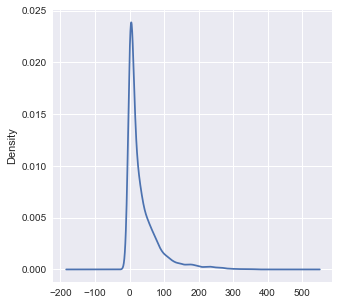

In [80]:
#bike_data['temp'].plot(kind="density", figsize=(5,5))
#bike_data['atemp'].plot(kind="density", figsize=(5,5))
bike_data['casual'].plot(kind="density", figsize=(5,5))

### What is Multicollinearity?

With the bike share data, let's compare three data points: actual temperature, "feel" temperature, and guest ridership. 

Our data is already normalized between 0 and 1, so we'll start off with the correlations and modeling.

            temp       hum    casual
temp    1.000000 -0.069881  0.459616
hum    -0.069881  1.000000 -0.347028
casual  0.459616 -0.347028  1.000000
Axes(0.125,0.125;0.62x0.755)


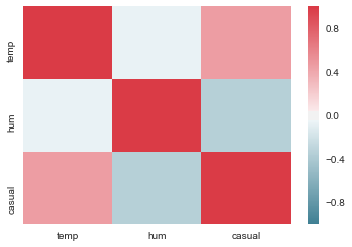

In [85]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
#bike_data.head()
correlations = bike_data[['temp', 'hum', 'casual']].corr()
print (correlations)
print (sns.heatmap(correlations, cmap=cmap)) ## visual map of correlation

### What does the correlation matrix explain?

Answer:  This shows that temp and atemp are correlated.

## We can measure this effect in the coefficients:



temp
P Values: [ 0.]
Coefficients: [ 117.68705779]
y-intercept: -22.812739188
R-Squared: 0.21124654163


C:\Users\BeckyC\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
C:\Users\BeckyC\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:611: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


atemp
P Values: [ 0.]
Coefficients: [ 130.27875081]
y-intercept: -26.3071675481
R-Squared: 0.206188705733
temp, atemp
P Values: [ 0.  0.]
Coefficients: [ 116.34021588    1.52795677]
y-intercept: -22.8703398286
R-Squared: 0.21124723661


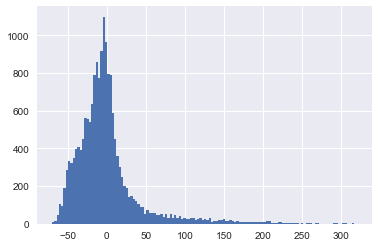

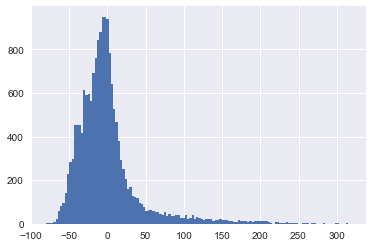

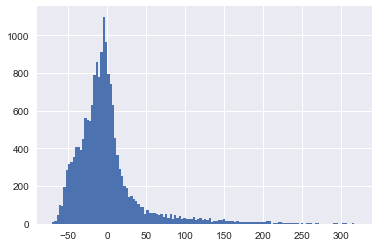

In [50]:
y = bike_data['casual']
x_sets = ( # create a dictionary of features
    ['temp'],
    ['atemp'],
    ['temp', 'atemp'],
)

for x in x_sets: ##build a model with temp, then atemp, then both
    print (', '.join(x))
    get_linear_model_metrics(bike_data[x], y, linear_model.LinearRegression())
    print

###  Intrepretation?

Answer: Graphs above are plotting residuals. There is little change in rsqd and distribution of residuals - i.e. no combination is fitting the line better. Temp is marginally better than atemp, so we would keep this feature and then try and find a new feature from the dataset.

P values show as "0." when they are too small to be expressed in scientific format - so we can be very confident that there is a relationship.

### What happens if we use a second variable that isn't highly correlated with temperature, like humidity?


P Values: [ 0.  0.]
Coefficients: [ 112.02457031  -80.87301833]
y-intercept: 30.7273338581
R-Squared: 0.310901196913


C:\Users\BeckyC\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
C:\Users\BeckyC\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:611: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

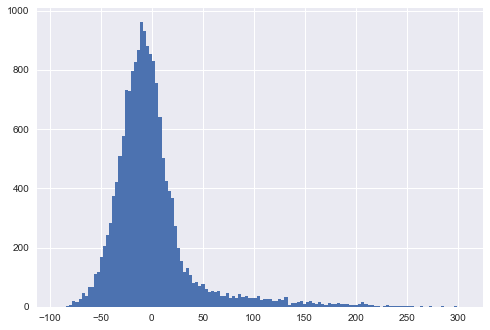

In [9]:
y = bike_data['casual']
x = bike_data[['temp', 'hum']]
get_linear_model_metrics(x, y, linear_model.LinearRegression())


## Guided Practice: Multicollinearity with dummy variables (15 mins)



There can be a similar effect from a feature set that is a singular matrix, which is when there is a clear relationship in the matrix (for example, the sum of all rows = 1).

### Run through the following code on your own.
#### What happens to the coefficients when you include all weather situations instead of just including all except one?

P Values: [  3.75616929e-73   3.43170021e-22   1.57718666e-55   2.46181288e-01]
Coefficients: [  5.33996323e+12   5.33996323e+12   5.33996323e+12   5.33996323e+12]
y-intercept: -5.33996323254e+12
R-Squared: 0.0233906300439


C:\Users\BeckyC\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
C:\Users\BeckyC\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:611: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


P Values: [  3.75616929e-73   3.43170021e-22   1.57718666e-55]
Coefficients: [ 37.87876398  26.92862383  13.38900634]
y-intercept: 2.66666666667
R-Squared: 0.0233906873841


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

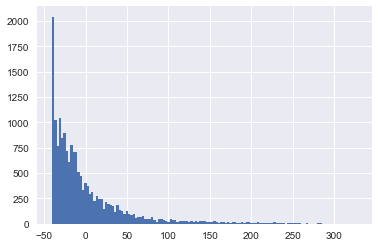

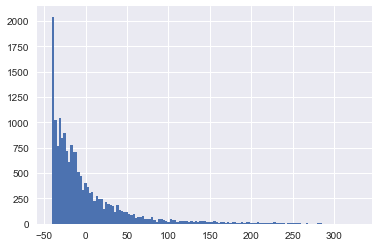

In [94]:
#for info, select distinct on 'weathersit'
bike_data['weathersit'].drop_duplicates() 

lm = linear_model.LinearRegression()
weather = pd.get_dummies(bike_data.weathersit) ## weather is a categorical variable so we create "dummies"

get_linear_model_metrics(weather[[1, 2, 3, 4]], y, lm) # y still = casual 
print
# drop the least significant (highest p value), weather situation  = 4
get_linear_model_metrics(weather[[1, 2, 3]], y, lm)


Answer: Coefs in the first model are identical, and in the second show a lot more variance.
Can't see any obvious difference in the residuals though, and the r sqd hasn't improved.

### Similar in Statsmodels

In [95]:
# all dummies in the model

##running against the ols package
lm_stats = smf.ols(formula='y ~ weather[[1, 2, 3, 4]]', data=bike_data).fit()
lm_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     103.9
Date:                Mon, 03 Apr 2017   Prob (F-statistic):           1.38e-87
Time:                        22:38:24   Log-Likelihood:                -92198.
No. Observations:               17379   AIC:                         1.844e+05
Df Residuals:                   17374   BIC:                         1.844e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept                -3.565e+13    4.6e+13     -0.774      0.439     -1.26e+14  5.46e+13
weather[[1, 2, 3, 4]][0]  3.565e+13    4.6e+13      0.774      0.439     -5.46e+13  1.26e+14
weather[[1, 2, 3, 4]][1]  3.565e+13    4.6e+13      0.774      0.439     -5.46e+13  1.26e+14
weather[[1, 2, 3, 4]][2]  3.565e+13    4.6e+13      0.774      0.439     -5.46e+13  1.26e+14
weather[[1, 2, 3, 4]][3]  3.565e+13    4.6e+13      0.774      0.439     -5.46e+13  1.26e+14
==============================================================================
Omnibus:                     8985.326   Durbin-Watson:                   0.137
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            58717.202
Skew:                           2.464   Prob(JB):                         0.00
Kurtosis:                      10.537   Cond. No.                     3.46e+14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.24e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [96]:
#droping one
lm_stats = smf.ols(formula='y ~ weather[[1, 2, 3]]', data=bike_data).fit()
lm_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     138.7
Date:                Mon, 03 Apr 2017   Prob (F-statistic):           8.08e-89
Time:                        22:38:38   Log-Likelihood:                -92197.
No. Observations:               17379   AIC:                         1.844e+05
Df Residuals:                   17375   BIC:                         1.844e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
Intercept                 2.6667     28.134      0.095      0.924       -52.478    57.812
weather[[1, 2, 3]][0]    37.8788     28.138      1.346      0.178       -17.274    93.031
weather[[1, 2, 3]][1]    26.9286     28.143      0.957      0.339       -28.235    82.092
weather[[1, 2, 3]][2]    13.3890     28.164      0.475      0.635       -41.814    68.592
==============================================================================
Omnibus:                     9001.632   Durbin-Watson:                   0.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            58962.554
Skew:                           2.468   Prob(JB):                         0.00
Kurtosis:                      10.553   Cond. No.                         189.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### What's the interpretation ? Do you want to keep all your dummy variables or drop one? Why? 




Answer: Drop one to increase the ability to discriminate in the remaining variables.

From Ayham:
This model makes more sense, because we can more easily explain the variables compared to the one we left out. 

For example, this suggests that a clear day (weathersit:1) on average brings in about 38 more riders hourly than a day with heavy snow. 

In fact, since the weather situations "degrade" in quality (1 is the nicest day, 4 is the worst), the coefficients now reflect that well. 

However at this point, there is still a lot of work to do, because weather on its own fails to explain ridership well.




## Guided Practice: Combining non-correlated features into a better model (15 mins)

In [103]:
bike_data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

## With a partner, complete this code together and visualize the correlations of all the numerical features built into the data set.

We want to:

- Add the three significant weather situations into our current model.
- Find two more features that are not correlated with current features, but could be strong indicators for predicting guest riders.


In [146]:
hours = pd.get_dummies(bike_data.hr)
hours.columns = ['Hour_' + str(i) for i in hours.columns]
hours.columns 
#bikemodel_data = bikemodel_data.join(holiday)
columns_custom=[]
columns_custom.extend(['hour_' + str(i) for i in range(1, 24)]) # why is this necessary? Automates writing out 24 hours?
columns_custom
#bikemodel_data.head()

['hour_1',
 'hour_2',
 'hour_3',
 'hour_4',
 'hour_5',
 'hour_6',
 'hour_7',
 'hour_8',
 'hour_9',
 'hour_10',
 'hour_11',
 'hour_12',
 'hour_13',
 'hour_14',
 'hour_15',
 'hour_16',
 'hour_17',
 'hour_18',
 'hour_19',
 'hour_20',
 'hour_21',
 'hour_22',
 'hour_23']

           weather_1  weather_2  weather_3  holiday_0  holiday_1    hour_1  \
weather_1   1.000000  -0.822961  -0.412414  -0.009167   0.009167  0.008819   
weather_2  -0.822961   1.000000  -0.177417  -0.004910   0.004910 -0.006750   
weather_3  -0.412414  -0.177417   1.000000   0.023664  -0.023664 -0.005379   
holiday_0  -0.009167  -0.004910   0.023664   1.000000  -1.000000 -0.000293   
holiday_1   0.009167   0.004910  -0.023664  -1.000000   1.000000  0.000293   
hour_1      0.008819  -0.006750  -0.005379  -0.000293   0.000293  1.000000   
hour_2      0.005156  -0.003921  -0.002518  -0.000744   0.000744 -0.043188   
hour_3     -0.001685   0.003843  -0.003117   0.003602  -0.003602 -0.042618   
hour_4     -0.000450   0.000506   0.000096   0.000093  -0.000093 -0.042618   
hour_5     -0.004791   0.011541  -0.010083  -0.000643   0.000643 -0.043251   
hour_6     -0.014011   0.017969  -0.004410  -0.000244   0.000244 -0.043502   
hour_7     -0.020841   0.015641   0.011168  -0.000144   0.000144

C:\Users\BeckyC\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
C:\Users\BeckyC\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:611: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

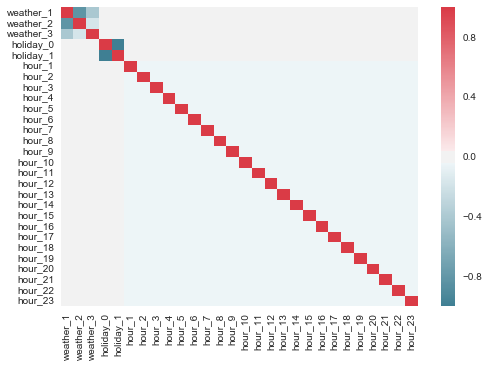

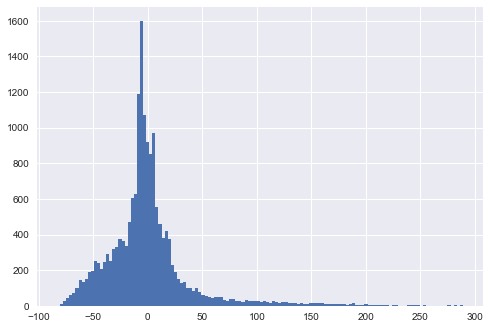

In [10]:
#starter 
lm = linear_model.LinearRegression()

weather = pd.get_dummies(bike_data.weathersit)
# adding a description plus 1,2,3 etc so that you can identify the columns, esp when you are creating a dummy for more than one field.
weather.columns = ['weather_'+ str(i) for i in weather.columns] #creates weather_1, weather_2 etc

hours = pd.get_dummies(bike_data.hr)
hours.columns = ['hour_' + str(i) for i in hours.columns]

holiday = pd.get_dummies(bike_data.holiday)
holiday.columns = ['holiday_'+str(i) for i in holiday.columns]

bikemodel_data = bike_data.join(weather) # add in all the old and new variables to a new dataframe, bikemodel_data.
bikemodel_data = bikemodel_data.join(hours)
bikemodel_data = bikemodel_data.join(holiday)

cmap = sns.diverging_palette(220, 10, as_cmap=True) #create colour pallette.

columns_to_keep =['weather_1','weather_2','weather_3','holiday_0','holiday_1',]
columns_to_keep.extend(['hour_' + str(i) for i in range(1, 24)]) # why is this necessary? Automates writing out 24 hours?

correlations = bikemodel_data[columns_to_keep].corr()

print (correlations)
print (sns.heatmap(correlations, cmap=cmap))

#columns_to_keep = [] #[which_variables?]
final_feature_set = bikemodel_data[columns_to_keep]

get_linear_model_metrics(final_feature_set, y, lm)

P Values: [  1.57667763e-073   4.65438461e-010   3.08091550e-101   2.20669338e-002
   2.20669338e-002   1.25728221e-104   3.16654620e-163   4.43205469e-255
   0.00000000e+000   3.66634752e-318   3.16291935e-139   3.91327380e-023
   9.32021985e-003   9.53413879e-015   4.01378046e-040   4.59689993e-069
   1.30604357e-088   2.17178403e-095   4.76632477e-102   2.13478631e-102
   1.40997159e-103   2.82538157e-111   4.92524377e-072   3.32332548e-040
   8.58150979e-015   8.05106387e-005   8.94334883e-001   3.52782886e-010]
Coefficients: [  8.91116476e-01   7.85965328e-01   4.59880278e-01   6.27991697e+11
   6.27991697e+11  -1.84200068e-01  -3.13601314e-01  -4.79571172e-01
  -5.98750177e-01  -5.59844971e-01  -2.57293701e-01   1.04309082e-01
   3.92822266e-01   5.13854980e-01   6.39739990e-01   7.36724854e-01
   7.95837402e-01   8.11737061e-01   8.28247070e-01   8.29757690e-01
   8.31222534e-01   8.52005005e-01   7.48634338e-01   6.33087158e-01
   5.06713867e-01   4.13299561e-01   3.17474365e-0

C:\Users\BeckyC\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
C:\Users\BeckyC\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:611: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

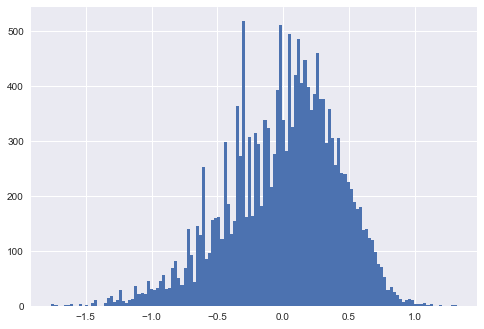

In [11]:
#sklearn
final_feature_set = bikemodel_data[columns_to_keep]

get_linear_model_metrics(final_feature_set, np.log10(y+1), lm)

In [ ]:
#Stats models
log_y = np.log10(y+1)
lm = smf.ols(formula=' log_y ~ temp + hum + windspeed + weather_1 + weather_2 + weather_3 + holiday + hour_1 + hour_2 + hour_3 + hour_4 + hour_5 + hour_6 + hour_7 + hour_8 + hour_9 + hour_10 + hour_11 + hour_12 + hour_13 + hour_14 + hour_15 + hour_16 + hour_18 + hour_19 + hour_20 + hour_21 + hour_22 + hour_23', data=bikemodel_data).fit()
#print the full summary
lm.summary()

## Independent Practice: Building models for other y variables (25 minutes)

We've completely a model together that explains casual guest riders. Now it's your turn to build another model, using a different y variable: registered riders.

#### Pay attention to:

* the distribution of riders (should we rescale the data?)  
* checking correlations with variables and registered riders  
* having a feature space (our matrix) with low multicollinearity  
* model complexity vs explanation of variance: at what point do features in a model stop improving r-squared?  
* the linear assumption -- given all feature values being 0, should we have no ridership? negative ridership? positive ridership?

#### Bonus

* Which variables would make sense to dummy (because they are categorical, not continuous)?  
* What features might explain ridership but aren't included in the data set? 
* Is there a way to build these using pandas and the features available?
* Outcomes If your model at least improves upon the original model and the explanatory effects (coefficients) make sense, consider this a complete task. 

### If your model has an r-squared above .4, this a relatively effective model for the data available. Kudos!